In [1]:
# notebooks/2_model_training.ipynb

# %% [markdown]
# # Training ML Models for Sales Prediction
# 
# This notebook demonstrates how to train machine learning models for predicting sales.

# %%
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sys
import os

# Add project root to path
sys.path.insert(0, os.path.abspath('..'))

# Import custom modules
from src.data_processing.data_loader import DataLoader
from src.models.classical_ml import SalesPredictor
from src.utils.logger import setup_logger

# Setup logging
logger = setup_logger("model_training")

# %%
# Load the processed data
data_loader = DataLoader()
df = data_loader.load_processed_data("processed_tech_sales.csv")

print(f"Dataset shape: {df.shape}")
df.head()

2025-05-20 21:06:06,391 - data_loader - INFO - Loading processed data from c:\Users\vgmar\smart-document-assistant\data\processed\processed_tech_sales.csv
2025-05-20 21:06:07,172 - data_loader - INFO - Successfully loaded 100000 processed records
Dataset shape: (100000, 23)


,transaction_id,transaction_date,product_category,quantity,customer_id,customer_type,payment_method,warranty_years,store_location,product_brand,...,purchase_year,purchase_month,purchase_day,purchase_dayofweek,purchase_quarter,is_business,has_email,price_category,purchase_volume,is_outlier
0,TXN1000000,2023-04-13,Laptops,3,c95bf829,Business,Debit Card,1,South Jeffrey,Lenovo,...,2023,4,13,3,2,1,1,Medium,Triple,0
1,TXN1000001,2023-12-15,Accessories,3,1c6ce8e5,Individual,Debit Card,2,Cunninghamfurt,Generic,...,2023,12,15,4,4,0,1,Low,Triple,0
2,TXN1000002,2023-09-28,Tablets,1,f282d6e1,Individual,Debit Card,3,Michaelport,Amazon,...,2023,9,28,3,3,0,1,Low,Single,0
3,TXN1000003,2023-04-17,Laptops,4,5dc5cc41,Individual,Credit Card,2,Port Nicole,HP,...,2023,4,17,0,2,0,1,High,Bulk,0
4,TXN1000004,2023-03-13,Laptops,2,71b2b098,Individual,Credit Card,1,West Kelseyfort,Asus,...,2023,3,13,0,1,0,1,Medium,Double,0


In [3]:
# %% [markdown]
# ## Train a Random Forest Model

# %%
# Initialize Random Forest model
rf_model = SalesPredictor(model_type='random_forest')

# Train the model
metrics_rf = rf_model.train(df, target_column='total_price')

# Display metrics
print("Random Forest Model Metrics:")
print(f"RMSE: {metrics_rf['rmse']:.2f}")
print(f"MAE: {metrics_rf['mae']:.2f}")
print(f"R²: {metrics_rf['r2']:.2f}")

# Save the model
rf_model.save_model("random_forest_sales_predictor.pkl")

2025-05-20 21:10:22,865 - classical_ml - INFO - Initializing random_forest model
2025-05-20 21:10:22,872 - classical_ml - INFO - Training random_forest model to predict total_price
2025-05-20 21:10:22,874 - classical_ml - INFO - Preparing features for modeling
2025-05-20 21:10:22,917 - classical_ml - INFO - Train set size: (80000, 10), Test set size: (20000, 10)
2025-05-20 21:10:22,925 - classical_ml - INFO - Fitting model...
2025-05-20 21:11:01,407 - classical_ml - INFO - Evaluating model...
2025-05-20 21:11:01,758 - classical_ml - INFO - Model evaluation metrics:
2025-05-20 21:11:01,758 - classical_ml - INFO - RMSE: 148.45
2025-05-20 21:11:01,759 - classical_ml - INFO - MAE: 5.13
2025-05-20 21:11:01,761 - classical_ml - INFO - R²: 1.00
Random Forest Model Metrics:
RMSE: 148.45
MAE: 5.13
R²: 1.00
2025-05-20 21:11:01,768 - classical_ml - INFO - Saving model to c:\Users\vgmar\smart-document-assistant\models\random_forest_sales_predictor.pkl
2025-05-20 21:11:01,796 - classical_ml - INFO 

True

In [4]:
# %% [markdown]
# ## Train a Gradient Boosting Model

# %%
# Initialize Gradient Boosting model
gb_model = SalesPredictor(model_type='gradient_boosting')

# Train the model
metrics_gb = gb_model.train(df, target_column='total_price')

# Display metrics
print("Gradient Boosting Model Metrics:")
print(f"RMSE: {metrics_gb['rmse']:.2f}")
print(f"MAE: {metrics_gb['mae']:.2f}")
print(f"R²: {metrics_gb['r2']:.2f}")

# Save the model
gb_model.save_model("gradient_boosting_sales_predictor.pkl")

2025-05-20 21:11:39,184 - classical_ml - INFO - Initializing gradient_boosting model
2025-05-20 21:11:39,186 - classical_ml - INFO - Training gradient_boosting model to predict total_price
2025-05-20 21:11:39,187 - classical_ml - INFO - Preparing features for modeling
2025-05-20 21:11:39,228 - classical_ml - INFO - Train set size: (80000, 10), Test set size: (20000, 10)
2025-05-20 21:11:39,234 - classical_ml - INFO - Fitting model...
2025-05-20 21:12:03,139 - classical_ml - INFO - Evaluating model...
2025-05-20 21:12:03,246 - classical_ml - INFO - Model evaluation metrics:
2025-05-20 21:12:03,248 - classical_ml - INFO - RMSE: 161.11
2025-05-20 21:12:03,249 - classical_ml - INFO - MAE: 59.14
2025-05-20 21:12:03,250 - classical_ml - INFO - R²: 1.00
Gradient Boosting Model Metrics:
RMSE: 161.11
MAE: 59.14
R²: 1.00
2025-05-20 21:12:03,259 - classical_ml - INFO - Saving model to c:\Users\vgmar\smart-document-assistant\models\gradient_boosting_sales_predictor.pkl
2025-05-20 21:12:03,271 - cl

True

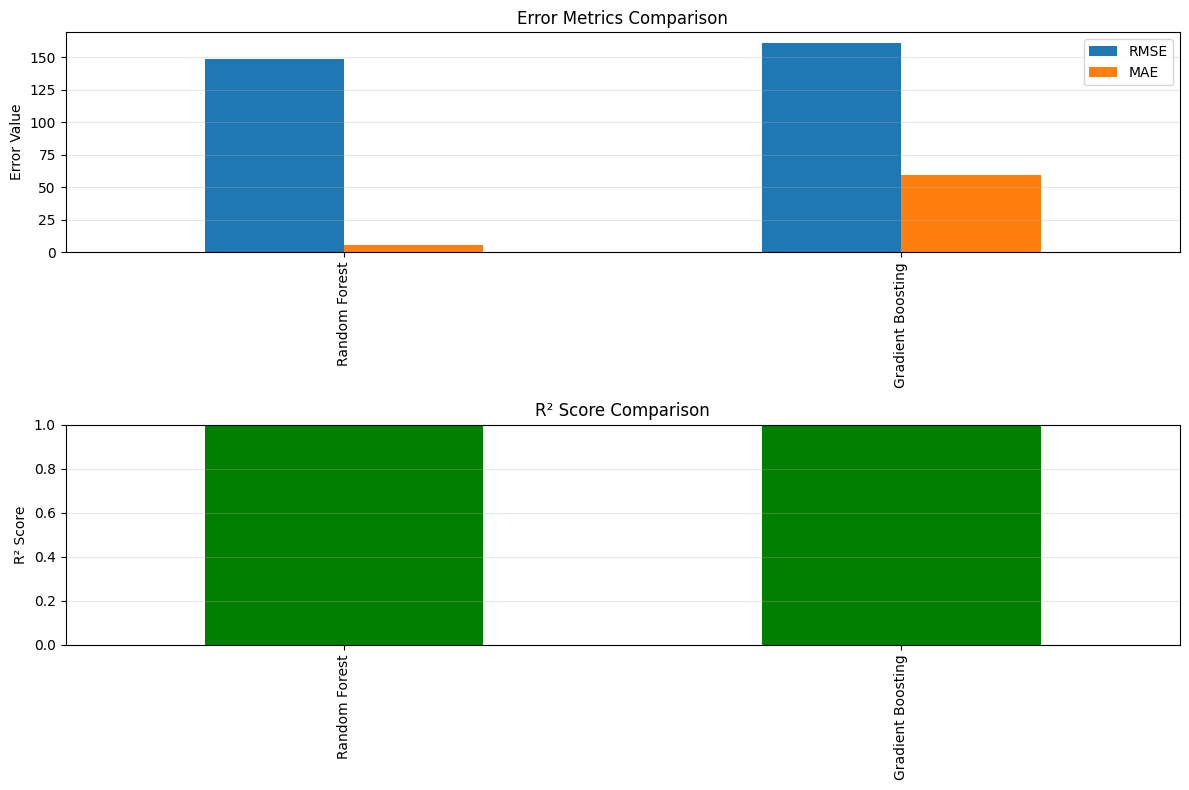

In [5]:
# %% [markdown]
# ## Compare Models

# %%
# Create comparison dataframe
models = ['Random Forest', 'Gradient Boosting']
metrics = ['RMSE', 'MAE', 'R²']

comparison_data = {
    'RMSE': [metrics_rf['rmse'], metrics_gb['rmse']],
    'MAE': [metrics_rf['mae'], metrics_gb['mae']],
    'R²': [metrics_rf['r2'], metrics_gb['r2']]
}

comparison_df = pd.DataFrame(comparison_data, index=models)
comparison_df

# %%
# Visualize comparison
plt.figure(figsize=(12, 8))

# RMSE and MAE comparison
plt.subplot(2, 1, 1)
comparison_df[['RMSE', 'MAE']].plot(kind='bar', ax=plt.gca())
plt.title('Error Metrics Comparison')
plt.ylabel('Error Value')
plt.grid(axis='y', alpha=0.3)

# R² comparison
plt.subplot(2, 1, 2)
comparison_df['R²'].plot(kind='bar', color='green', ax=plt.gca())
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

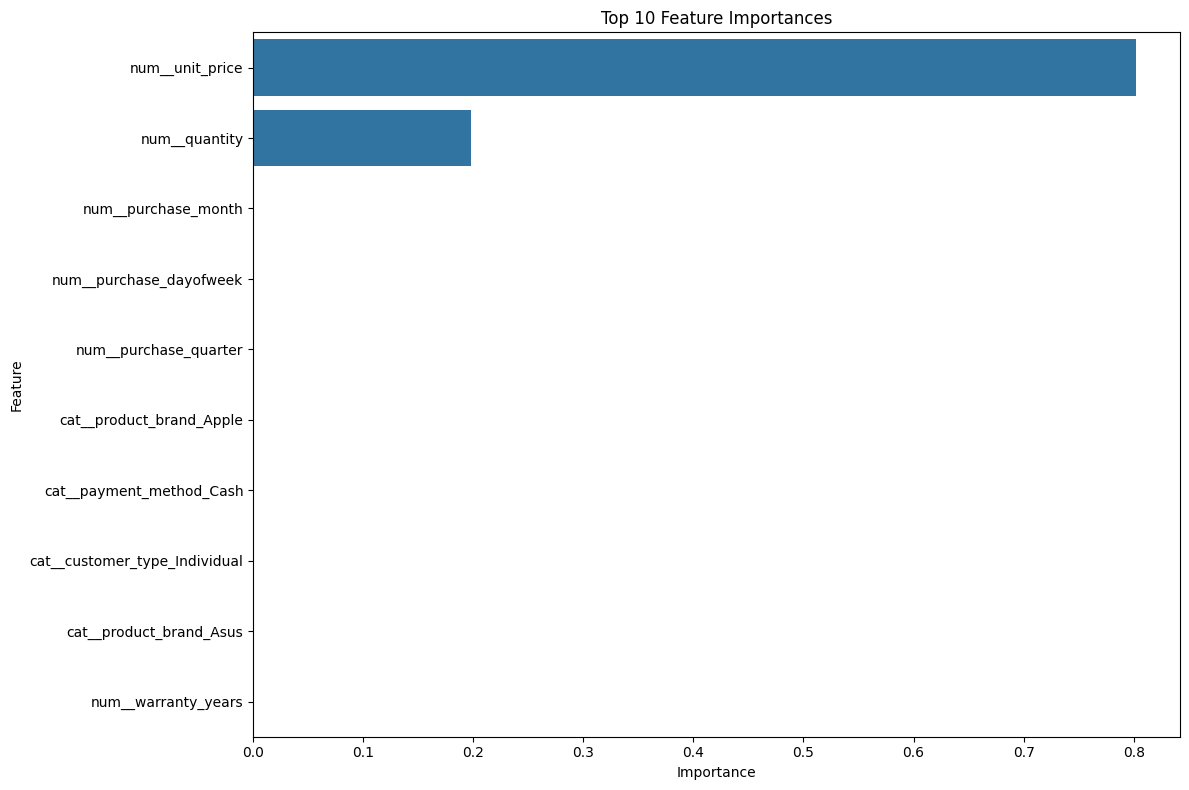

In [6]:
# %% [markdown]
# ## Feature Importance Analysis

# %%
# Load the best model to analyze feature importance
best_model = rf_model  # Using Random Forest for interpretability

# Get feature names
feature_names = best_model.model.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances
importances = best_model.model.named_steps['model'].feature_importances_

# Create a dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Visualize top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [7]:
# %% [markdown]
# ## Make Test Predictions

# %%
# Create a small test case
test_data = df.sample(5).copy()

# Make predictions
predictions = best_model.predict(test_data)

# Create comparison dataframe
test_comparison = pd.DataFrame({
    'Actual': test_data['total_price'].values,
    'Predicted': predictions
})
test_comparison['Difference'] = test_comparison['Actual'] - test_comparison['Predicted']
test_comparison['Percent Error'] = (abs(test_comparison['Difference']) / test_comparison['Actual']) * 100

test_comparison

2025-05-20 21:17:25,184 - classical_ml - INFO - Making predictions on 5 records
2025-05-20 21:17:25,187 - classical_ml - INFO - Preparing features for modeling
2025-05-20 21:17:25,223 - classical_ml - INFO - Predictions completed successfully


,Actual,Predicted,Difference,Percent Error
0,1443.20,1445.874794,-2.674794,0.185338
1,248.74,248.760276,-0.020276,0.008152
2,3364.20,3362.997302,1.202698,0.035750
3,2440.12,2437.968151,2.151849,0.088186
4,1936.32,1938.134854,-1.814854,0.093727
